In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [2]:
clip1 = VideoFileClip("project_video.mp4")

In [3]:
filename = 'scripts/calibrate_camera.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

filename = 'scripts/distortion_correct.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

filename = 'scripts/thresholding.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

filename = 'scripts/full_pipeline.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))


In [4]:
# Get the distortion corrector
mtx, dist = read_camera_calibration('files/camera_calibration.p')
distortion_correcter = CorrectDistortion(mtx, dist)

# Get the lane_extractor
lane_extractor = ExtractLanes(        
        abs_x_sobel_kernel=5, abs_x_thresh=(20, 100),
        abs_y_sobel_kernel=3, abs_y_thresh=(20, 100),
        mag_thresh_sobel_kernel=3, mag_thresh=(30, 100),
        dir_thresh_sobel_kernel=15, dir_thresh=(0.7, 1.3),
        color_s_thresh = (170, 255)
)

In [5]:
frame_processor = ProcessFrame(distortion_correcter, lane_extractor)
def process_image(img):
    try:
        processed_img = frame_processor.run(img)
        return processed_img
    except:
        return img

### Test on the first frame to make sure things are ok

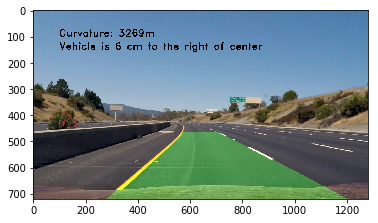

In [6]:
plt.imshow(frame_processor.run(clip1.get_frame(0)))

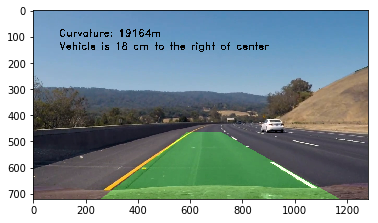

In [7]:
plt.imshow(frame_processor.run(clip1.get_frame(26)))

### Process the full video

In [12]:
frame_processor = ProcessFrame(distortion_correcter, lane_extractor)
project_video_output = 'advanced_lane_lines_final.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
processed_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!


In [13]:
%time processed_clip.write_videofile(project_video_output, audio=False)

[MoviePy] >>>> Building video advanced_lane_lines_final.mp4
[MoviePy] Writing video advanced_lane_lines_final.mp4


100%|█████████▉| 1260/1261 [07:12<00:00,  3.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: advanced_lane_lines_final.mp4 

CPU times: user 6min 57s, sys: 2min 6s, total: 9min 3s
Wall time: 7min 13s


In [14]:
HTML("""
<video width="640" height="360" controls>
  <source src="{0}">
</video>
""".format('advanced_lane_lines_final.mp4'))

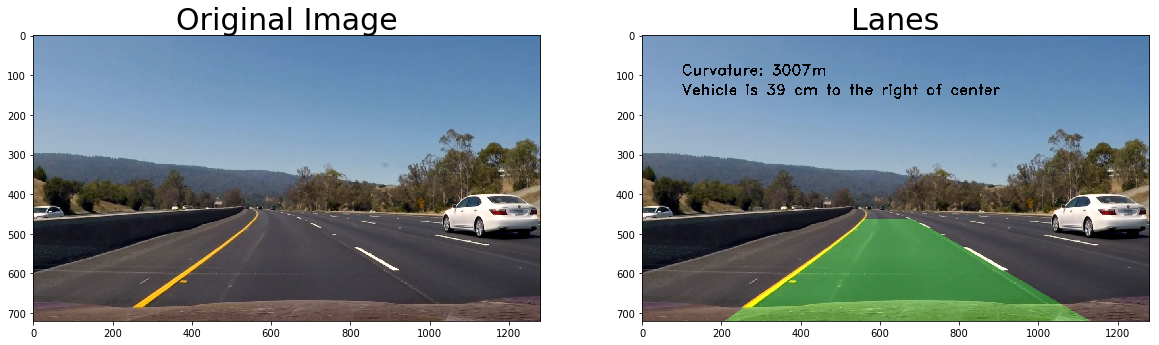

In [15]:
frame_processor = ProcessFrame(distortion_correcter, lane_extractor)
img= clip1.get_frame(10)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.set_title('Lanes', fontsize=30)
ax2.imshow(process_image(img))